# Chapter 6. AI 기초 - Regression 2
* 교재 : 으뜸 머신러닝(생능출판)
* 출처 : https://www.booksr.co.kr/product/9788970503691/

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 1. Feature Selection

In [2]:
data = pd.read_csv('./Data/boston.csv')
data.head(3)

,ID,TOWN,TOWNNO,TRACT,LON,LAT,x,y,MEDV,CMEDV,...,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.0,0.0,2011.0,-70.955,42.2550,338.73,4679.73,24.0,24.0,...,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,2.0,0.0,1.0,2021.0,-70.950,42.2875,339.23,4683.33,21.6,21.6,...,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,3.0,0.0,1.0,2022.0,-70.936,42.2830,340.37,4682.80,34.7,34.7,...,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


## Correlation
* 상관계수가 0.3 보다 작으면 상관관계가 약하다고 판단
* 상관계수가 0.3 보다 크면 상관관계가 있다고 판단
* 상관계수가 0.7 보다 크면 강한 상관관계가 있다고 판단

### Heatmap

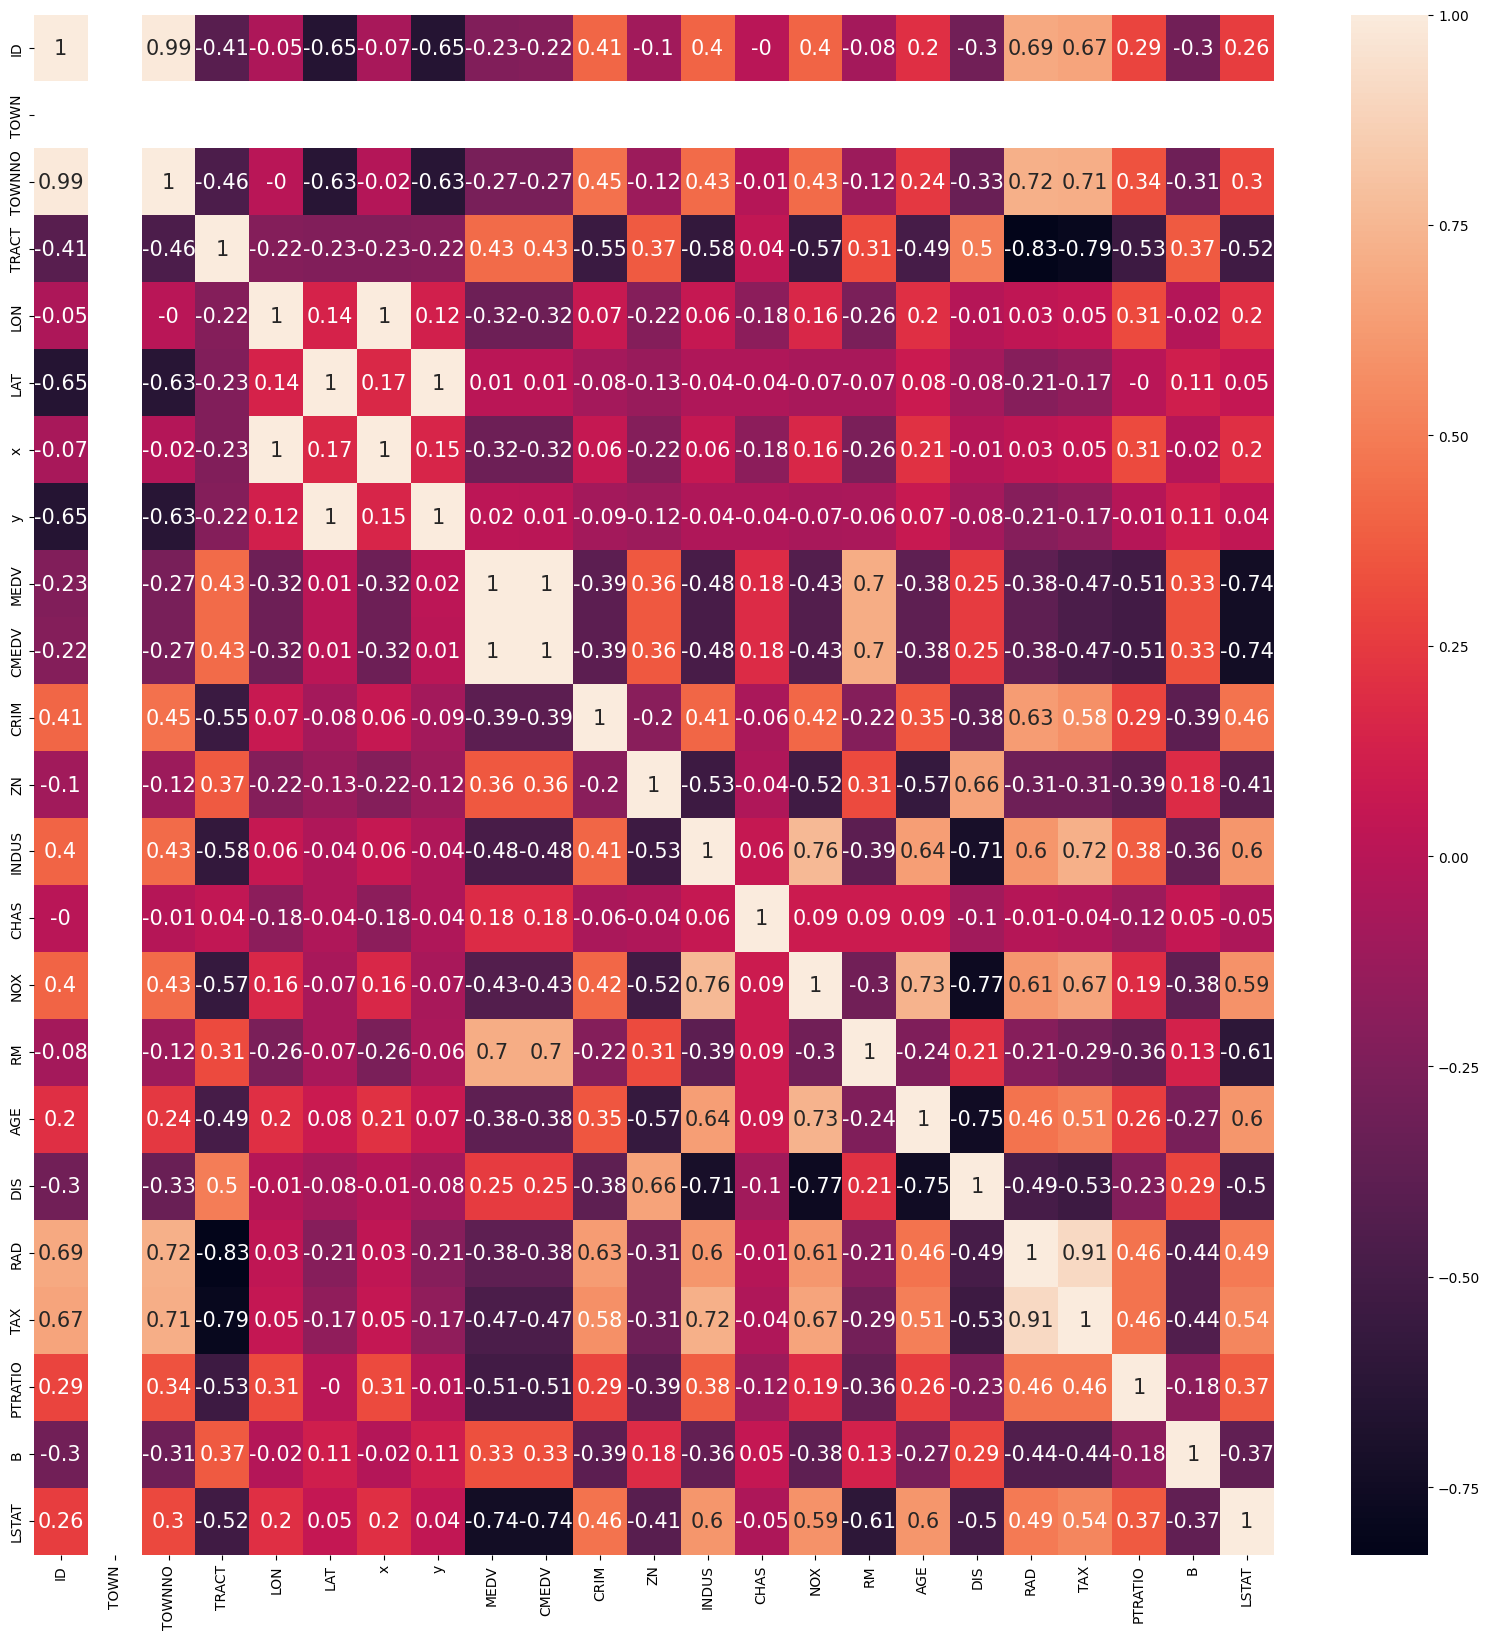

In [3]:
plt.figure(figsize = (20,20))

sns.heatmap(data.corr().round(2), annot = True, annot_kws = {"fontsize":15})

plt.show()

### 3-Dimension Scatter Plot

In [4]:
x = data[['LSTAT','RM']]
y = data['MEDV']

In [5]:
# 각도 조절
%matplotlib qt5

In [6]:
fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x['LSTAT'],x['RM'],y)

ax.set_xlabel('LSTAT')
ax.set_ylabel('RM')
ax.set_zlabel('MEDV')

plt.show()

In [7]:
# 각도 조절 해제
%matplotlib inline

## Plot Surface
* https://matplotlib.org/stable/gallery/mplot3d/surface3d.html

In [8]:
x.shape

(506, 2)

* 앞의 506은 데이터 수로 바뀌어도 괜찮지만 뒤의 2는 Feature의 수로 바뀌면 안된다.

### Multivariate Regression

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [10]:
pf = PolynomialFeatures(degree = 2)
X_pf = pf.fit_transform(x)

lr_model = LinearRegression()
lr_model.fit(X_pf, y)

LinearRegression()

In [11]:
xx = np.arange(0,40,1) # LSTAT
yy = np.arange(0,10,1) # RM
xx, yy = np.meshgrid(xx, yy)

print(xx.shape, yy.shape)

(10, 40) (10, 40)


In [12]:
zz = lr_model.predict(pf.transform(np.concatenate([xx.reshape(-1,1), yy.reshape(-1,1)], axis = 1))).reshape(-1,1)

print(zz.shape)

(400, 1)


### 3-Dimension Scatter Plot

In [13]:
# 각도 조절
%matplotlib qt5

In [14]:
fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x['LSTAT'],x['RM'],y)

ax.plot_surface(xx, yy, zz.reshape(xx.shape), color = None, rstride = 1, cstride = 1, alpha = 0.3)

ax.set_xlabel('LSTAT')
ax.set_ylabel('RM')
ax.set_zlabel('MEDV')

plt.show()

In [15]:
# 각도 조절 해제
%matplotlib inline

# 2. Standardization(표준화)
* 각각의 독립변수의 단위가 다를 때 적절한 학습이 이루어지지 않을 수 있음
* 따라서 각각의 독립변수를 적당한 규모로 변경하기 위해 표준화 진행
* Normalization(정규화)도 Standardization(표준화)와 같은 방법
* 실제로는 Standardization(표준화)를 많이 활용

## Data Split

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as SS, MinMaxScaler as MS

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

## Modeling

In [18]:
pf = PolynomialFeatures(degree = 2)
X_pf = pf.fit_transform(X_train)

lr_model = LinearRegression()
lr_model.fit(X_pf, Y_train)

LinearRegression()

## Evaluate

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
pred = lr_model.predict(pf.transform(X_test))

print('Before Scaling')
print('MSE : {:.4f}'.format(mean_squared_error(Y_test, pred)))

Before Scaling
MSE : 23.8056


## Scaling
* 데이터 분포를 보고 특정한 범위 없이 정규분포의 형태를 띄고 있으면 StandardScaler를 사용
* StandardScaler ex : 키(특정한 범위 없이 정규분포를 가지기 때문)
* 데이터 분포를 보고 특정한 범위를 가지고 있으면 MinMaxScaler를 사용용
* MinMaxScaler ex : 시험(정규분포를 따르지만 0점부터 100점이라는 범위를 가지기 때문)

### StandardScaler

In [21]:
# StandardScaler
ss = SS()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

pf = PolynomialFeatures(degree = 2)
X_pf = pf.fit_transform(X_train_ss)

lr_model = LinearRegression()
lr_model.fit(X_pf, Y_train)

pred = lr_model.predict(pf.transform(X_test_ss))

print('After Standard Scaling')
print('MSE : {:.4f}'.format(mean_squared_error(Y_test, pred)))

After Standard Scaling
MSE : 23.8056


* 원래는 평균적으로 성능이 더 좋아지지만 현재 데이터에서는 변화가 없는 것으로 확인

### MinMaxScaler

In [22]:
# StandardScaler
ms = MS()
X_train_ms = ms.fit_transform(X_train)
X_test_ms = ms.transform(X_test)

pf = PolynomialFeatures(degree = 2)
X_pf = pf.fit_transform(X_train_ms)

lr_model = LinearRegression()
lr_model.fit(X_pf, Y_train)

pred = lr_model.predict(pf.transform(X_test_ms))

print('After MinMax Scaling')
print('MSE : {:.4f}'.format(mean_squared_error(Y_test, pred)))

After MinMax Scaling
MSE : 23.8056


* 마찬가지로 평균적으로 성능이 더 좋아지지만 현재 데이터에서는 변화가 없는 것으로 확인

# 3. Regularized Regression
* 과적합을 피하기 위한 방법
* Ridge, Lasso : 모델 항의 수를 줄이기 위한 방법

## Data
* https://archive.ics.uci.edu/ml/datasets/Wine

In [23]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)
data.columns = ['class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
data.head(3)

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [24]:
data.shape

(178, 14)

## Data Split

In [25]:
Y = data['class']
X = data.drop('class', axis = 1)

print(X.shape, Y.shape)

(178, 13) (178,)


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size = 0.3,
                                                    # 각 클래스를 랜덤하게 뽑도록 설정
                                                    stratify = Y,
                                                    random_state = 0)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(124, 13) (124,)
(54, 13) (54,)


## Scaling

### StandardScaler

In [27]:
ss = SS()
ss.fit_transform(X_train)

X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

## Modeling

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr_model = LogisticRegression(solver = 'liblinear',
                              multi_class = 'auto',
                              # 규제 강도 alpha = C
                              C = 1,
                              penalty = 'l1',
                              random_state = 0)
lr_model.fit(X_train_ss, Y_train)

LogisticRegression(C=1, penalty='l1', random_state=0, solver='liblinear')

## Evaluate

In [30]:
lr_model.score(X_test_ss, Y_test)

1.0

* 1.0 : test 데이터를 넣었을 때 100% 맞춘다는 의미
* 실제로 100% 맞추는 경우는 거의 없음

## Lasso Regression

In [31]:
# 가중치(절편)
weights = []
# 규제항
params = []
score = []

for c in range(-4, 6) :
    lr_model = LogisticRegression(solver = 'liblinear',
                              multi_class = 'auto',
                              # 규제 강도 alpha = C
                              C = 10**c,
                              penalty = 'l1',
                              random_state = 0)
    lr_model.fit(X_train_ss, Y_train)
    
    weights.append(lr_model.coef_[1]) # 클래스 3개 중 하나만 확인
    params.append(10**c)
    score.append(lr_model.score(X_test_ss, Y_test))

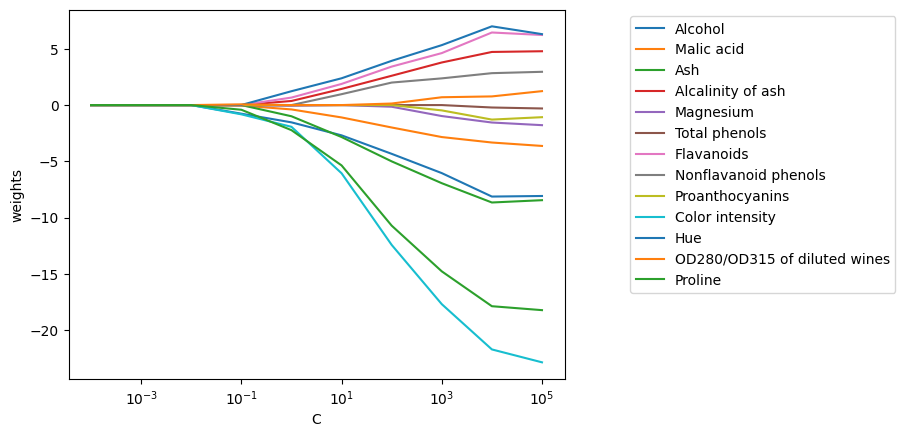

In [32]:
weights = np.array(weights) # 슬라이싱을 위한 변환

fig = plt.figure()

ax = plt.subplot(111)

for col in range(len(data.columns[1:])) :
    plt.plot(params, weights[:, col], label = data.columns[col + 1])

plt.xlabel('C')
plt.ylabel('weights')
plt.xscale('log')

ax.legend(loc = 'upper center', bbox_to_anchor = (1.4,1.0), ncol = 1, fancybox = True)
plt.show()

* Nonflavanoid phenols가 가장 0에 빨리 수렴하는 것을 확인
* 먼저 0에 수렴할수록 제외해도 괜찮은 변수

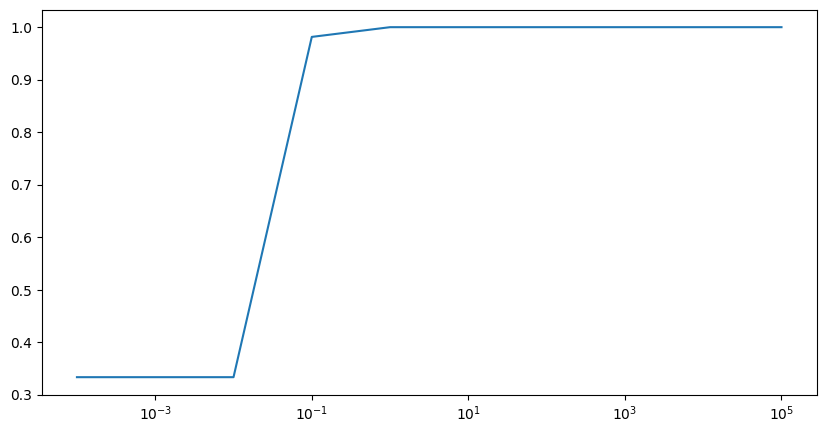

In [33]:
plt.figure(figsize = (10, 5))

plt.plot(params, score)

plt.xscale('log')

plt.show()

## Ridge Regression

In [34]:
# 가중치(절편)
weights = []
# 규제항
params = []
score = []

for c in range(-4, 6) :
    lr_model = LogisticRegression(solver = 'liblinear',
                              multi_class = 'auto',
                              # 규제 강도 alpha = C
                              C = 10**c,
                              penalty = 'l2',
                              random_state = 0)
    lr_model.fit(X_train_ss, Y_train)
    
    weights.append(lr_model.coef_[1]) # 클래스 3개 중 하나만 확인
    params.append(10**c)
    score.append(lr_model.score(X_test_ss, Y_test))

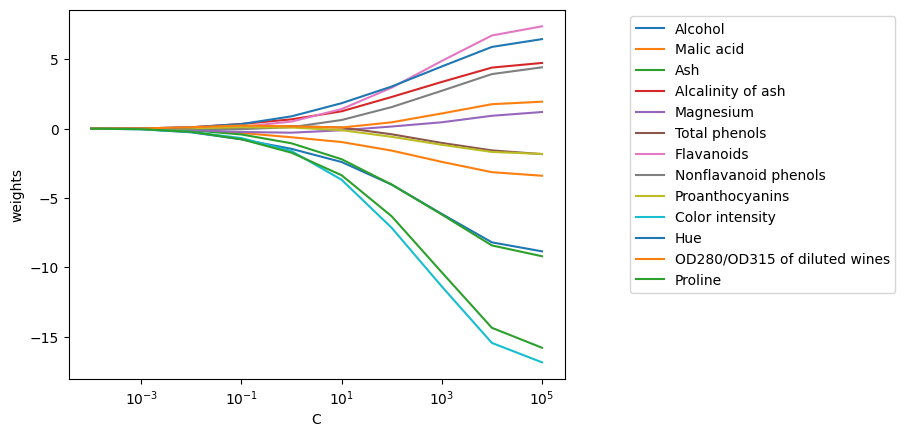

In [35]:
weights = np.array(weights) # 슬라이싱을 위한 변환

fig = plt.figure()

ax = plt.subplot(111)

for col in range(len(data.columns[1:])) :
    plt.plot(params, weights[:, col], label = data.columns[col + 1])

plt.xlabel('C')
plt.ylabel('weights')
plt.xscale('log')

ax.legend(loc = 'upper center', bbox_to_anchor = (1.4,1.0), ncol = 1, fancybox = True)
plt.show()

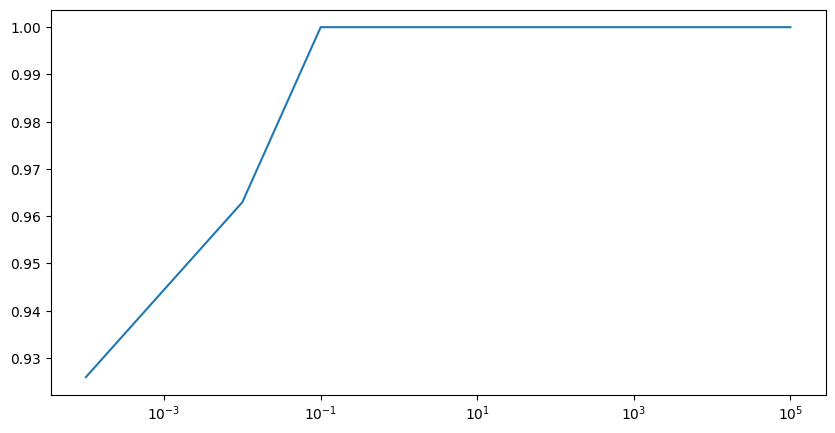

In [36]:
plt.figure(figsize = (10, 5))

plt.plot(params, score)

plt.xscale('log')

plt.show()

## Lasso VS Ridge
* score graph를 비교해보면 Lasso는 한번에 수렴하지만, Ridge는 단계를 거쳐 수렴하는 것을 확인
* 특성을 선택하기에는 Lasso가 좋고, 모델을 안정적으로 쓰는 데는 Ridge가 좋다.